In [171]:
!pip install alpha_vantage

In [172]:
!pip install tushare

In [0]:
MY_API_KEY = 'J4PS1W9LI8IL0E97'
as_of_today = '2019-06-14'
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')
import os

In [0]:
semana = 52

In [176]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ts = TimeSeries(key='MY_API_KEY', output_format='pandas');
data1, meta_data1 = ts.get_daily(symbol='DJCI', outputsize='full');
data1 = data1['4. close'];
data2, meta_data2 = ts.get_daily(symbol='SPY', outputsize='full');
data2 = data2['4. close'];
data3, meta_data3 = ts.get_daily(symbol='DGAZ', outputsize='full');
data3 = data3['4. close'];
data4, meta_data4 = ts.get_daily(symbol='QQQ', outputsize='full');
data4 = data4['4. close'];
data5, meta_data5 = ts.get_daily(symbol='GLD', outputsize='full');
data5 = data5['4. close'];
data1 = pd.DataFrame(data1);
data1.columns = ['DJCI']
data2 = pd.DataFrame(data2);
data2.columns = ['SPY']
data3 = pd.DataFrame(data3);
data3.columns = ['DGAZ']
data4 = pd.DataFrame(data4);
data4.columns = ['QQQ']
data5 = pd.DataFrame(data5);
data5.columns = ['GLD']
data1.index = pd.to_datetime(data1.index)
data2.index = pd.to_datetime(data2.index)
data3.index = pd.to_datetime(data3.index)
data4.index = pd.to_datetime(data4.index)
data5.index = pd.to_datetime(data5.index)

mg1 = pd.merge(left = data1, left_index=True, right= data2, right_index= True, how='inner')
mg2 = pd.merge(left = mg1, left_index=True, right= data3, right_index= True, how='inner')
mg3 = pd.merge(left = mg2, left_index=True, right= data4, right_index= True, how='inner')
dataall = pd.merge(left = mg3, left_index=True, right= data5, right_index= True, how='inner')

In [0]:
os.chdir("/content/drive/My Drive/summer_lecture/")

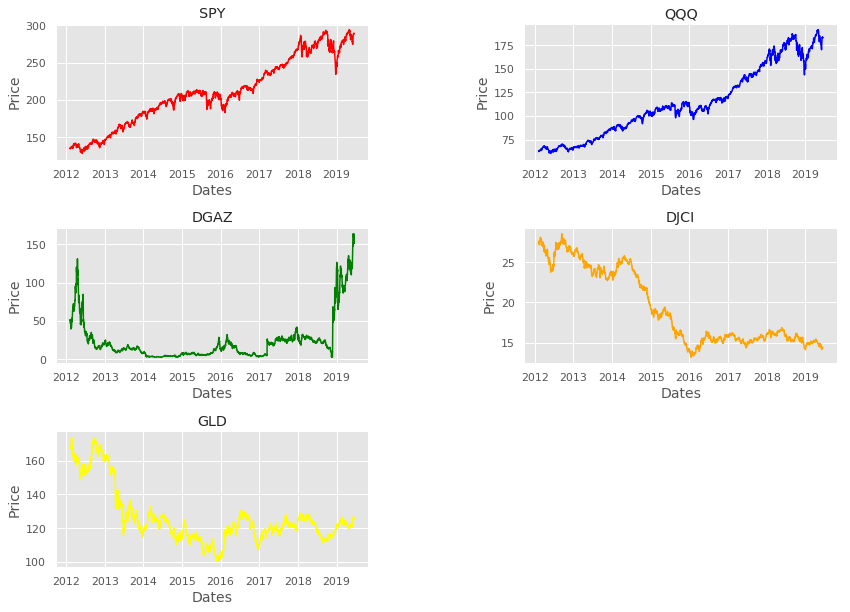

In [180]:
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()
ax.plot(dataall['DGAZ'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('DGAZ')

plt.subplot(321)
ax = plt.gca()
ax.plot(dataall['SPY'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('SPY')

plt.subplot(322)
ax = plt.gca()
ax.plot(dataall['QQQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('QQQ')

plt.subplot(324)
ax = plt.gca()
ax.plot(dataall['DJCI'], color='orange')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('DJCI')

plt.subplot(325)
ax = plt.gca()
ax.plot(dataall['GLD'], color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('GLD')

plt.show();


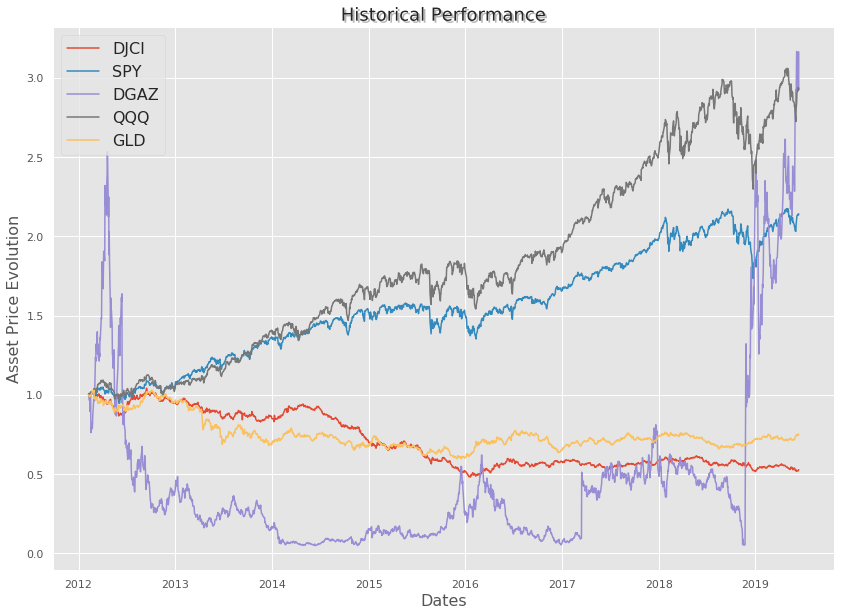

In [190]:
from matplotlib import patheffects
normalized_series = (dataall/dataall.iloc[0])
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)
title_text_obj = plt.title("Historical Performance", fontsize = 18)
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0), alpha = 0.6)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','EMB','GLD')
plt.legend(('DJCI','SPY','DGAZ','QQQ','GLD'),fontsize = 16,loc = 'upper left')
plt.show()

In [0]:
dataall_returns = np.log(dataall/dataall.shift(1))
dataall_returns.dropna(inplace=True)

In [0]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =dataall_returns.mean() * semana *100
stats['Annualized Volatility(%)'] = dataall_returns.std() * np.sqrt(semana)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']

In [193]:
print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
DJCI,-1.80125,6.01338,-0.299541
SPY,2.14034,5.89399,0.36314
DGAZ,3.02581,81.1284,0.0372965
QQQ,3.01924,7.34853,0.410863
GLD,-0.805379,6.67702,-0.12062


KeyError: ignored

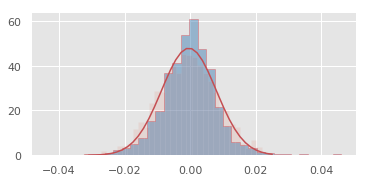

In [0]:

binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()

ax.hist(dataall_returns['DJCI'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['DJCI'].std(),dataall_returns['DJCI'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['DJCI'].skew(),2),round(dataall_returns['AGG'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('DJCI')

# plt.subplot(321)
# ax1 = plt.gca()
# ax1.hist(dataall_returns['SPY'], bins=binsnumber, color='steelblue', density = True,
#        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

# sigma, mu = dataall_returns['SPY'].std(),dataall_returns['SPY'].mean() # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
# count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
# ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

# ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['SPY'].skew(),2),round(dataall_returns['SPY'].kurtosis(),2)),
#              xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


# ax1.set_xlabel('Values')
# ax1.set_ylabel('Frequency')
# ax1.set_title('SPY')

# plt.subplot(322)
# ax = plt.gca()
# ax.hist(dataall_returns['DGAZ'], bins=binsnumber, color='steelblue', density = True,
#        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

# sigma, mu = dataall_returns['DGAZ'].std(),dataall_returns['DGAZ'].mean() # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
# count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
# ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
# ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['DGAZ'].skew(),2),round(dataall_returns['QQQ'].kurtosis(),2)),
#              xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


# ax.set_xlabel('Values')
# ax.set_ylabel('Frequency')
# ax.set_title('DGAZ')

# plt.subplot(324)
# ax = plt.gca()
# ax.hist(dataall_returns['QQQ'], bins=binsnumber, color='steelblue', density = True,
#        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

# sigma, mu = dataall_returns['QQQ'].std(),dataall_returns['QQQ'].mean() # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
# count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
# ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
# ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['QQQ'].skew(),2),round(dataall_returns['EMB'].kurtosis(),2)),
#              xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


# ax.set_xlabel('Values')
# ax.set_ylabel('Frequency')
# ax.set_title('QQQ')

# plt.subplot(325)
# ax = plt.gca()
# ax.hist(dataall_returns['GLD'], bins=binsnumber, color='steelblue', density = True,
#        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

# sigma, mu = dataall_returns['GLD'].std(),dataall_returns['GLD'].mean() # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
# count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
# ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
# ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['GLD'].skew(),2),round(dataall_returns['GLD'].kurtosis(),2)),
#              xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


# ax.set_xlabel('Values')
# ax.set_ylabel('Frequency')
# ax.set_title('GLD')

# plt.show();
# fig3.savefig('histos.png',dpi=fig3.dpi)

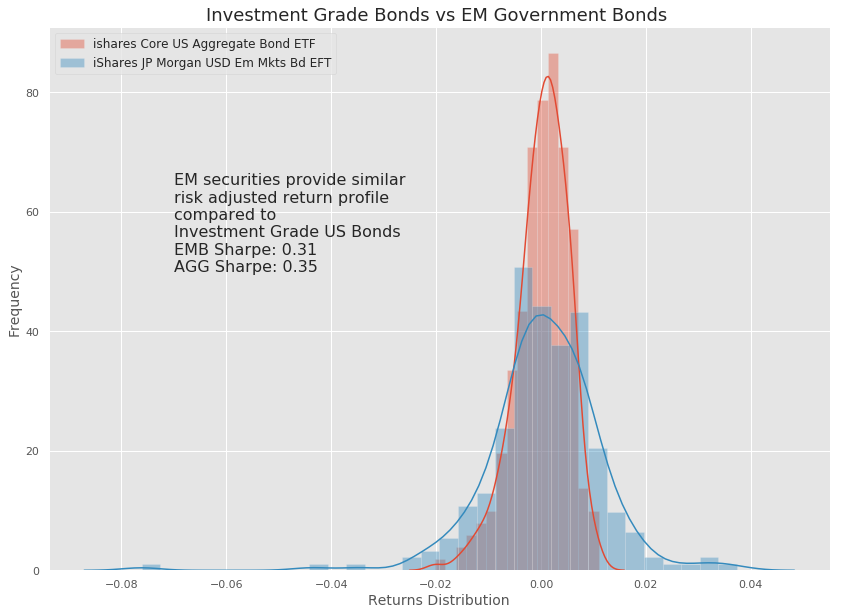

In [0]:
fig4 = plt.figure(figsize=(14,10))
sns.distplot(datos_returns['AGG'])
sns.distplot(datos_returns['EMB'])
plt.legend(('ishares Core US Aggregate Bond ETF','iShares JP Morgan USD Em Mkts Bd EFT'),fontsize = 12)

# anotate an important value
plt.annotate('EM securities provide similar\nrisk adjusted return profile\ncompared to \nInvestment Grade US Bonds\nEMB Sharpe: {}\nAGG Sharpe: {}'.format(round(stats.loc['EMB','Sharpe Ratio'],2),round(stats.loc['AGG','Sharpe Ratio'],2)),
             xy=(-.01,40),xycoords = 'data',xytext =(-.07, 50),fontsize=16)
plt.title('Investment Grade Bonds vs EM Government Bonds ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

In [0]:
allocation = pd.DataFrame(data =[[.30,.30],[.35,.35],[.15,.15],[0,.20],[.20,0]],
                          index=['AGG','SPY','QQQ','EMB','GLD'],
                         columns =['No_EM','EM'])
allocation

,No_EM,EM
AGG,0.30,0.30
SPY,0.35,0.35
QQQ,0.15,0.15
EMB,0.00,0.20
GLD,0.20,0.00


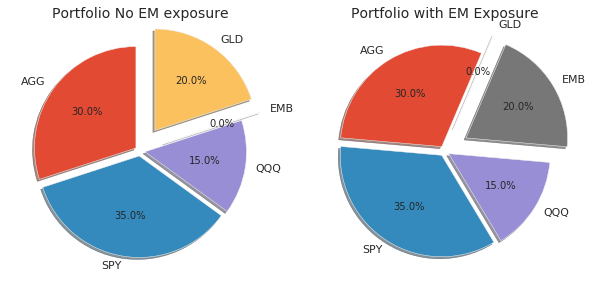

In [0]:
fig5 =plt.figure(figsize=(10,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = [.05,.05,.05,.25,.25]

labels = ['AGG','SPY','QQQ','EMB','GLD']

plt.subplot(121)
plt.pie(allocation['No_EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 90,shadow=True)
plt.title('Portfolio No EM exposure',fontsize =14)

plt.subplot(122)
plt.pie(allocation['EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67, shadow= True)
plt.title('Portfolio with EM Exposure',fontsize =14)

plt.show();
fig5.savefig('pies.png',dpi=fig5.dpi)

In [0]:
normalized_series1 = normalized_series.copy()
normalized_series1['EM'] = normalized_series[['AGG','SPY','QQQ','EMB','GLD']].mul(allocation.EM.values,axis=1).sum(axis=1)
normalized_series1['no_EM'] = normalized_series.mul(allocation['No_EM'].values,axis=1).sum(axis=1)

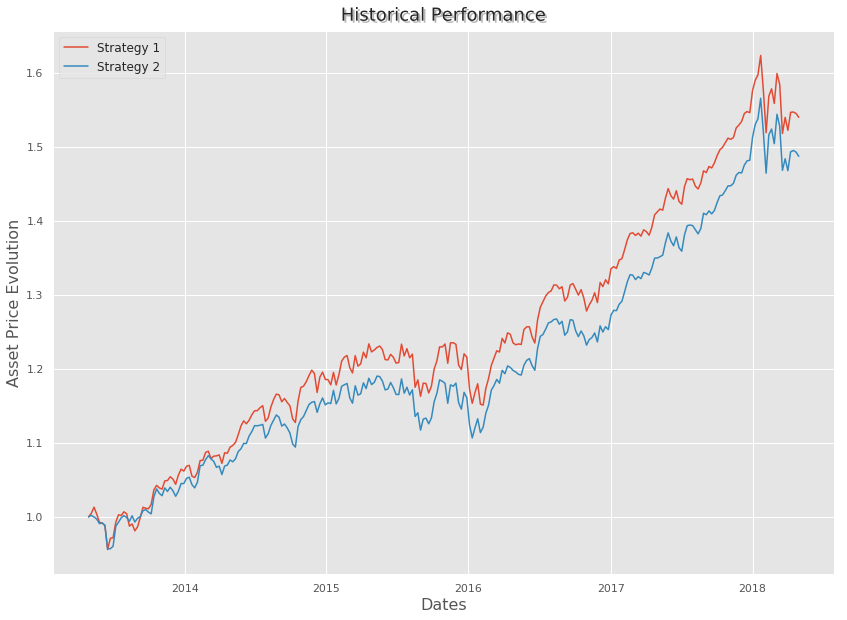

In [0]:
from matplotlib import patheffects
fig6 =plt.figure(figsize=(14,10))
ax = plt.gca()
ax.plot(normalized_series1[['EM','no_EM']])

title_text_obj = plt.title("Historical Performance", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','EMB','GLD')
ax.legend(('Strategy 1', 'Strategy 2'),fontsize = 12)
# ax.annotate('Strategy 2',('2018-04-30',1.4),xycoords = 'data',xytext =('2013-08-30',1.4),arrowprops =dict(arrowstyle ='->'),fontsize=14)
plt.show()
fig6.savefig('portfolioscomp.png',dpi=fig6.dpi)

In [0]:
datos_returns.corr('pearson')

,AGG,SPY,QQQ,EMB,GLD
AGG,1.000000,-0.111919,-0.063819,0.574893,0.418678
SPY,-0.111919,1.000000,0.905131,0.384069,-0.167545
QQQ,-0.063819,0.905131,1.000000,0.337579,-0.147379
EMB,0.574893,0.384069,0.337579,1.000000,0.244306
GLD,0.418678,-0.167545,-0.147379,0.244306,1.000000


In [0]:
Expected_Return_noEM = np.sum(datos_returns.mean()* allocation.No_EM)* semana

In [0]:
Expected_Std_noEM = np.sqrt(np.dot(allocation.No_EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.No_EM)))

In [0]:
Sharpe_noEM = Expected_Return_noEM / Expected_Std_noEM
Expected_Return_EM = np.sum(datos_returns.mean()* allocation.EM)* semana
Expected_Std_EM = np.sqrt(np.dot(allocation.EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.EM)))
Sharpe_EM = Expected_Return_EM / Expected_Std_EM
print('Key Stats: Portfolio with no EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_noEM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_noEM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_noEM))
print(82*'-')
print('Key Stats: Portfolio with EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_EM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_EM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_EM))
print(82*'-')

Key Stats: Portfolio with no EM Securities 
Annualized Returns: 6.583%
Annualized Volatility: 6.577%
Sharpe Ratio: 1.001
----------------------------------------------------------------------------------
Key Stats: Portfolio with EM Securities 
Annualized Returns: 7.637%
Annualized Volatility: 7.054%
Sharpe Ratio: 1.083
----------------------------------------------------------------------------------


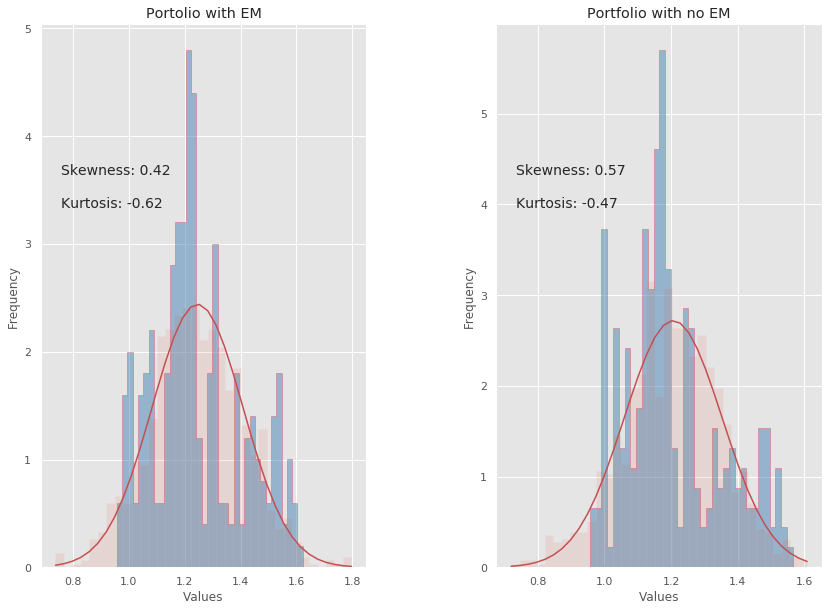

In [0]:
binsnumber = 35

fig7, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(121)
ax = plt.gca()

ax.hist(normalized_series1['EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['EM'].std(),normalized_series1['EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['EM'].skew(),2),round(normalized_series1['EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Portolio with EM')

plt.subplot(122)
ax1 = plt.gca()
ax1.hist(normalized_series1['no_EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['no_EM'].std(),normalized_series1['no_EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['no_EM'].skew(),2),round(normalized_series1['no_EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Portfolio with no EM')
plt.show();
fig7.savefig('portfolioshistos.png',dpi=fig7.dpi)

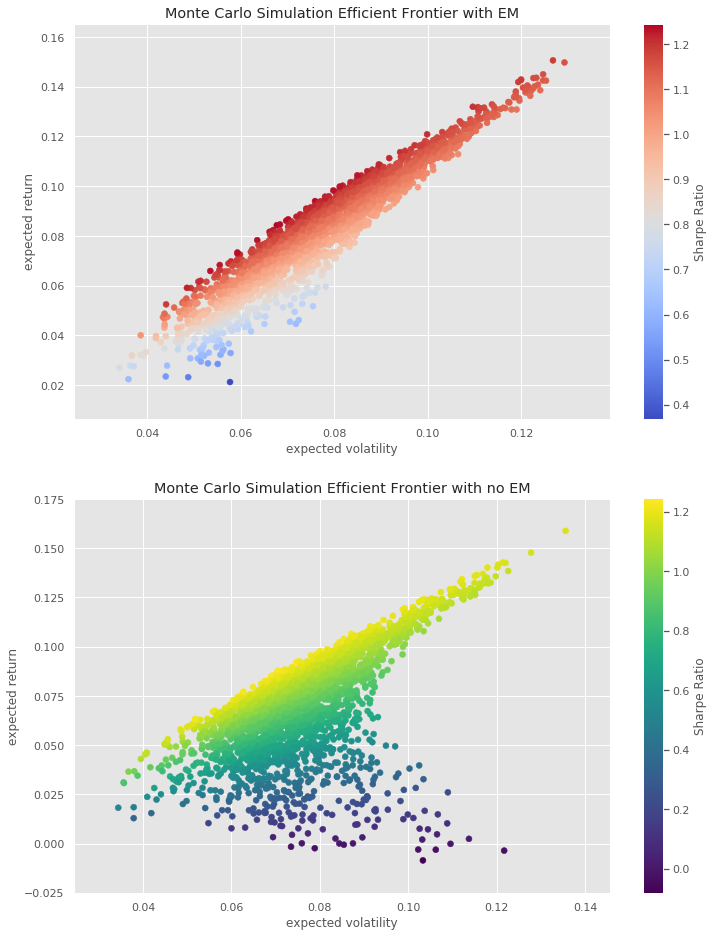

In [0]:
pretsEM = []
pvolsEM = []

prets_noEM = []
pvols_noEM = []

[['AGG','SPY','QQQ','EMB']]
[['AGG','SPY','QQQ','GLD']]

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    pretsEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','EMB']].mean()* weights)* semana)
    pvolsEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','EMB']].cov()*semana,
                                                             weights))))
pretsEM = np.array(pretsEM)
pvolsEM = np.array(pvolsEM)

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    prets_noEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','GLD']].mean()* weights)* semana)
    pvols_noEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','GLD']].cov()*semana,
                                                             weights))))
prets_noEM = np.array(prets_noEM)
pvols_noEM = np.array(pvols_noEM)

# the charts

fig8 = plt.figure(figsize = (12,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(211)

plt.scatter(pvolsEM, pretsEM, c = pretsEM / pvolsEM, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')

plt.subplot(212)

plt.scatter(pvols_noEM, prets_noEM, c = prets_noEM / pvols_noEM, marker = 'o',cmap='viridis')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with no EM')

plt.show();
fig8.savefig('frontiers.png',dpi=fig8.dpi)

In [0]:
def trailing_ret(retornos, window, weights, annualization = 52):
    
    roll_ret = retornos.rolling(window=window).mean()
    roll_ret = roll_ret.dropna()
    roll_ret = (roll_ret * weights)* annualization
    roll_ret = roll_ret.sum(axis =1)
    roll_ret = roll_ret.to_frame()
    roll_ret.rename(columns ={0:'returns'}, inplace = True)
    return roll_ret

In [0]:
def trailing_cov2(retornos, window, weights, annualization = 52):
    retornos_length = len(retornos)
    retornos_width = len(retornos.columns)
    roll_cov = retornos.rolling(window=window).cov()
    roll_cov_dates = np.unique(roll_cov.index.get_level_values(0).values)
    roll_cov_dates = roll_cov_dates[window-1:]
    roll_cov = roll_cov.values.reshape(retornos_length,retornos_width,retornos_width)
    roll_cov = roll_cov[window-1:] * annualization
    weights = weights.values.reshape(len(weights),1)
    step1 = np.tensordot(roll_cov,weights,axes=[1,0])
    step2 = np.tensordot(weights,step1, axes=[0,1])
    volatility = np.sqrt(step2)
    volatility = volatility.reshape((retornos_length-(window-1)),1)
    
    trailing_vol = pd.DataFrame()
            
    trailing_vol['date'] = roll_cov_dates
    trailing_vol['volatility'] = volatility
    
    trailing_vol.set_index('date',inplace = True)
    
    return trailing_vol

In [0]:
def full_analysis(retornos, window, weights, annualization = 52):
    volatilidad = trailing_cov2(retornos = retornos, window = window, weights = weights, annualization = annualization)
    retornos = trailing_ret(retornos = retornos, window = window, weights = weights, annualization = annualization)
    fusion = pd.merge(volatilidad, retornos, left_index=True,right_index=True)
    fusion['sharpe'] = fusion['returns']/fusion['volatility']
    return fusion

In [0]:
port_matrix = full_analysis(datos_returns,12,allocation.EM)


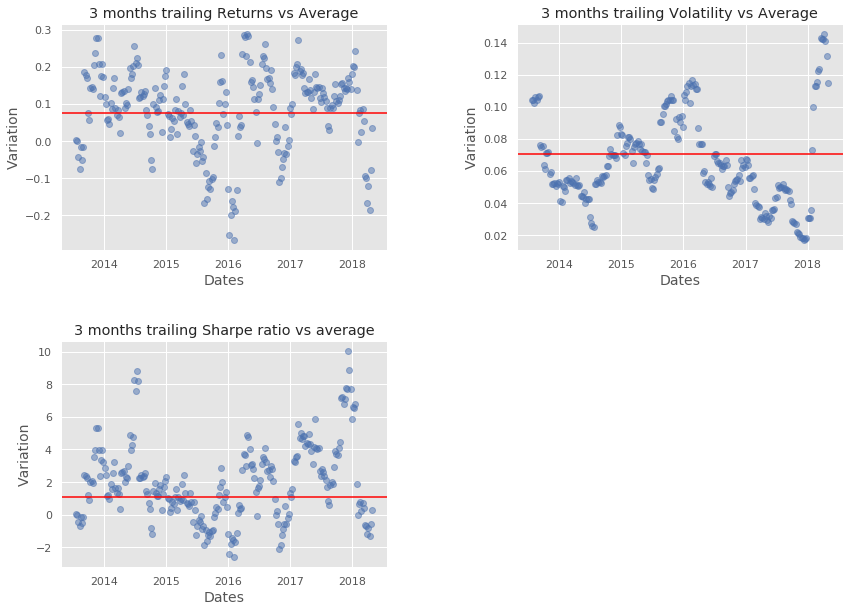

In [0]:
fig9 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(222)
plt.plot(port_matrix.volatility, 'bo',alpha=0.5)
plt.axhline(Expected_Std_EM, color = 'red')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Volatility vs Average')

plt.subplot(221)
plt.plot(port_matrix.returns, 'bo',alpha = 0.5)
plt.axhline(Expected_Return_EM,color = 'red')

plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Returns vs Average')

plt.subplot(223)
plt.plot(port_matrix.sharpe, 'bo',alpha = 0.5)
plt.axhline(Sharpe_EM,color = 'red')


plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Sharpe ratio vs average')

plt.show();
fig9.savefig('trailings.png',dpi=fig9.dpi)